<a href="https://colab.research.google.com/github/JamesPeralta/Machine-Learning-Algorithms/blob/master/Miscellaneous/GYMNOS/HelperFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Helper functions
### In this note book I have functions for
* Pulling frames from a video and storing it in a seperate folder
* Function to increment each video
* Function that will create a dataset csv file

---
## Setup

In [0]:
import cv2                       # for capturing videos
import math                      # for mathematical operations
import matplotlib.pyplot as plt  # for plotting the images
import csv
import pandas as pd
from sklearn.utils import shuffle

from google.colab import drive
import os

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


---
## Go into each video in the Video_Dataset and pull frames every 0.2 seconds

In [0]:
# Define the source and desination folders
overhead_source = '/content/drive/My Drive/GYMNO/Video Dataset/Overhead Press/FaceView/'
squat_source = '/content/drive/My Drive/GYMNO/Video Dataset/Squats/FaceView/'

frames_destination = '/content/drive/My Drive/GYMNO/Video Dataset/Test/'

In [0]:
# Params:
#   count: Last proccessed frame number
#   source: Source Folder of videos to process
#   destination: Destination Folder where frames are stored in
def extractFramesFromDirectory(count, source, destination):

  all_videos = os.listdir(source)
  print(all_videos)

  for video in all_videos:

    videoFile = source + video # Retrieve a video from the OverHeadPress

    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path

    frameRate = cap.get(cv2.CAP_PROP_FPS) # Frame rate


    x=1
    dim = (224,224)
    while(cap.isOpened()):

        frameId = cap.get(1) #current frame number

        ret, frame = cap.read()
        if (ret != True):
            break

        # We are capturing at 28 frames per second. 
        # If we want to capture every 0.2 seconds we will take every 5 frames
        if (frameId % 8 == 0):
            filename ="frame%d.jpg" % count
            count+=1
            resized = cv2.resize(frame, dim)
            cv2.imwrite(destination + filename, resized)

    cap.release()
    print ("Finished processing: " + video + ". Ended at video: " + str(count))

In [0]:
# Process the overhead press folder
extractFramesFromDirectory(0, overhead_source, frames_destination)

In [0]:
# Process the squats folder
extractFramesFromDirectory(1935, squat_source, frames_destination)

---
## Method to convert all video names to incremental format. 
* Ex) video0.MOV, video1.MOV, video2.MOV

In [0]:
# Params:
#   source: Source Folder of videos to process
def standardizeFileNames(source):
  
  # Convert File Names into a List
  video_list = os.listdir(source)
  print(video_list)
  
  # Switch into the Directory and rename all files
  os.chdir(source)
  for i in range(len(video_list)):
    os.rename(video_list[i], 'video'+ str(i) + '.MOV')

----
## Get the size of a directory

In [0]:
random_directory = os.listdir(frames_destination)
print(len(random_directory))

4431


---
## Generate a Labels CSV

In [0]:
dataset_root = '/content/drive/My Drive/GYMNO/Video Dataset/'

In [0]:
def generateLabelsCsv(csv_location):
  
  os.chdir(csv_location)
  
  with open('labels.csv', mode='w') as csv_file:
    fieldnames = ['Frame_ID', 'Class']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    
    for i in range(0, 1935):
      writer.writerow({'Frame_ID': 'frame'+str(i)+'.jpg', 'Class': '0'})
    
    for i in range(1935, 4431):
      writer.writerow({'Frame_ID': 'frame'+str(i)+'.jpg', 'Class': '1'})

In [0]:
generateLabelsCsv(dataset_root)

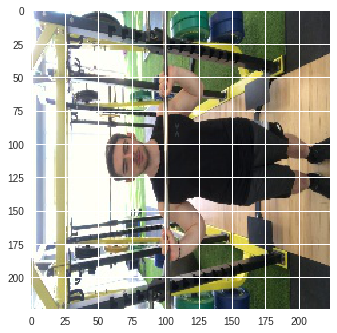

In [0]:
os.chdir(frames_destination)
a_frame = plt.imread('frame1934.jpg')
plt.imshow(a_frame)

## Generate a Partitions CSV

In [0]:
def generatePartitionsCsv(csv_location):
  # Initialize dictionaries for storting metadata of the dataset
  count = 0         # Counts the current frame we are on
  partition = {}    # Will contain which frames are in the Train, Test, and Validation sets
  train = []
  validation = []
  test = []
  
  # Read in the Labels csv
  os.chdir('/content/drive/My Drive/GYMNO/Video Dataset')
  data = pd.read_csv('labels.csv')
  
  # Shuffle the data and 
  data = shuffle(data)

  # Break the data into Partitions for train, validation and test
  dataset_size = len(data)
  training_size = math.floor(dataset_size * 0.70)    # 70% frames are for training
  validation_size = math.floor(dataset_size * 0.20)  # 20% are for validation
  
  for index, frames in data.iterrows():
    if count < training_size:  
      train.append(frames.Frame_ID)
    elif count < (training_size + validation_size):                 
      validation.append(frames.Frame_ID)
    else:                                 # 10% are for testing
      test.append(frames.Frame_ID)
    
    count += 1
   
  # Store the sets into the dictionary
  print(len(train))
  print(len(validation))
  print(len(test))

  partition['train'] = train
  partition['validation'] = validation
  partition['test'] = test
  
  # Save the partitions dictionary in a csv
  with open('partitions.csv', 'w') as csvfile:
    fieldnames = ['Partition', 'Dataset']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'Partition': 'train', 'Dataset': partition['train']})
    writer.writerow({'Partition': 'validation', 'Dataset': partition['validation']})
    writer.writerow({'Partition': 'test', 'Dataset': partition['test']})

In [9]:
generatePartitionsCsv(dataset_root)

3101
886
444
